In [ ]:
# Maryland Bill Analysis
# CAPITAL NEWS SERVICE -- JAKE GLUCK

# uses the legiscan api
# https://legiscan.com/gaits/documentation/legiscan

In [93]:
#import libraries and load in config

import pandas as pd
import numpy as np
import requests
import json
import matplotlib
import matplotlib.pyplot
import datetime
import time

keys={}
with open("config.json","r") as f:
    config = json.loads(f.read())
   
    
legiscan_key = config["legiscan_key"]

In [21]:
#list sessions

def pullData():

    params = {
        'key': legiscan_key,
        'op' : "getSessionList",
        'state' : "MD"
    }

    url = 'https://api.legiscan.com/'
    r = requests.get(url, params=params)
    return r.json()

data = pullData()
sessions = data["sessions"]
for s in sessions:
    print(s)

{'session_id': 1636, 'state_id': 20, 'year_start': 2019, 'year_end': 2019, 'special': 0, 'session_name': 'Regular Session', 'name': '2019 Regular Session', 'session_hash': 'f5c7818c1860431a21e62740e9d99c72'}
{'session_id': 1528, 'state_id': 20, 'year_start': 2018, 'year_end': 2018, 'special': 0, 'session_name': 'Regular Session', 'name': '2018 Regular Session', 'session_hash': '5f6112d0c336f21b9f162f66a812cf89'}
{'session_id': 1412, 'state_id': 20, 'year_start': 2017, 'year_end': 2017, 'special': 0, 'session_name': 'Regular Session', 'name': '2017 Regular Session', 'session_hash': '4a88b1c26c865d63d192460561dc8323'}
{'session_id': 1192, 'state_id': 20, 'year_start': 2016, 'year_end': 2016, 'special': 0, 'session_name': 'Regular Session', 'name': '2016 Regular Session', 'session_hash': '9d51dd5b57b2f88be09a3e540976bf50'}
{'session_id': 1133, 'state_id': 20, 'year_start': 2015, 'year_end': 2015, 'special': 0, 'session_name': 'Regular Session', 'name': '2015 Regular Session', 'session_has

<Response [200]>


In [95]:
#get all bills from session
def pullAllBills(session_id, state):

    params = {
        'key': legiscan_key,
        'op' : "getMasterList",
        "id" : session_id,
        'state' : state
    }

    url = 'https://api.legiscan.com/'
    r = requests.get(url, params=params)
    return r.json()

#pull the bills individual information
def getBill(bill_id):

    params = {
        'key': legiscan_key,
        'op' : "getBill",
        'id' : bill_id
    }

    url = 'https://api.legiscan.com/'
    
    found = False
    
    while(found == False):
        try:
            r = requests.get(url, params=params)
            found = True
        except requests.exceptions.RequestException as e:  # This is the correct syntax
            time.sleep(2)
      
    return r.json()

data = pullAllBills("1528", "md")
masterlist = data["masterlist"]

ids = []
numbers = []
hashes = []
urls = []
status_dates = []
statuses = []
last_action_dates = []
last_actions = []
titles = []
descriptions = []

session_ids = []
session_names = []
state_links = []
completeds = []
states = []
state_ids = []
bill_types = []
bill_type_ids = []
bodies = []
body_ids = []
current_bodies = []
current_body_ids = []
pending_committee_ids = []
  
progress_events = []
progress_dates = []

history_dates = []
history_actions = []
history_chambers = []
history_chamber_ids = []
history_importances = []

sponsor_people_ids = []
sponsor_party_ids = []
sponsor_parties = []
sponsor_role_ids = []
sponsor_roles = []
sponsor_names = []
sponsor_districts = []

votes_roll_call_ids = []
votes_dates = []
votes_descs = []
votes_yeas = []
votes_nays = []
votes_nvs = []
votes_absents = []
votes_totals = []
votes_passeds = []
votes_chambers = []
votes_chamber_ids = []
votes_urls = []
votes_state_links = []

bill_num = 0

while str(bill_num) in masterlist:
    print("scraping bill # " + str(bill_num))
    bill_id = masterlist[str(bill_num)]["bill_id"]
    ids.append(bill_id) 
    numbers.append(masterlist[str(bill_num)]["number"]) 
    hashes.append(masterlist[str(bill_num)]["change_hash"]) 
    urls.append(masterlist[str(bill_num)]["url"]) 
    s_date = datetime.datetime.strptime(masterlist[str(bill_num)]["status_date"], '%Y-%m-%d').date()
    status_dates.append(s_date) 
    statuses.append(masterlist[str(bill_num)]["status"]) 
    l_date = datetime.datetime.strptime(masterlist[str(bill_num)]["last_action_date"], '%Y-%m-%d').date()
    last_action_dates.append(l_date) 
    last_actions.append(masterlist[str(bill_num)]["last_action"]) 
    titles.append(masterlist[str(bill_num)]["title"]) 
    descriptions.append(masterlist[str(bill_num)]["description"]) 
    bill_num = bill_num + 1
    
    data = getBill(bill_id)
    bill_data = data["bill"]
      
    session_ids.append(bill_data["session_id"])
    session_names.append(bill_data["session"]["session_name"])
    state_links.append(bill_data["state_link"])
    completeds.append(bill_data["completed"])
    states.append(bill_data["state"])
    state_ids.append(bill_data["state_id"])
    bill_types.append(bill_data["bill_type"])
    bill_type_ids.append(bill_data["bill_type_id"])
    bodies.append(bill_data["body"])
    body_ids.append(bill_data["body_id"])
    current_bodies.append(bill_data["current_body"])
    current_body_ids.append(bill_data["current_body_id"])
    pending_committee_ids.append(bill_data["pending_committee_id"])
     
    # gather progress information
    progress = bill_data["progress"] 
    p_dates = []
    p_events = []                 
    for p in progress:
        p_dates.append(p["date"])
        p_events.append(p["event"]) 
    progress_events.append(p_events)
    progress_dates.append(p_dates)   
                      
            
    # gather history information                              
    history = bill_data["history"]     
    h_dates = []
    h_actions = []
    h_chambers = []
    h_chamber_ids = []
    h_importances = []
    for h in history:
        h_dates.append(h["date"])
        h_actions.append(h["action"])
        h_chambers.append(h["chamber"])
        h_chamber_ids.append(h["chamber_id"])
        h_importances.append(h["importance"])
    history_dates.append(h_dates)
    history_actions.append(h_actions)
    history_chambers.append(h_chambers)
    history_chamber_ids.append(h_chamber_ids)
    history_importances.append(h_importances)
                           
    # gather sponsor information                              
    sponsors = bill_data["sponsors"]    
    s_people_ids = []
    s_party_ids = []
    s_parties = []
    s_role_ids = []
    s_roles = []
    s_names = []
    s_districts = []
    for s in sponsors:
        s_people_ids.append(s["people_id"])
        s_party_ids.append(s["party_id"])
        s_parties.append(s["party"])
        s_role_ids.append(s["role_id"])
        s_roles.append(s["role"])
        s_names.append(s["name"])
        s_districts.append(s["district"])
    sponsor_people_ids.append(s_people_ids)
    sponsor_party_ids.append(s_party_ids)
    sponsor_parties.append(s_parties)
    sponsor_role_ids.append(s_role_ids)
    sponsor_roles.append(s_roles)
    sponsor_names.append(s_names)
    sponsor_districts.append(s_districts)
                           
    # gather vote information                              
    votes = bill_data["votes"]  
    v_roll_call_ids = []
    v_dates = []
    v_descs = []
    v_yeas = []
    v_nays = []
    v_nvs = []
    v_absents = []
    v_totals = []
    v_passeds = []
    v_chambers = []
    v_chamber_ids = []
    v_urls = []
    v_state_links = []
    for v in votes:
        v_roll_call_ids.append(v["roll_call_id"])
        v_dates.append(v["date"])
        v_descs.append(v["desc"])
        v_yeas.append(v["yea"])
        v_nays.append(v["nay"])
        v_nvs.append(v["nv"])
        v_absents.append(v["absent"])
        v_totals.append(v["total"])
        v_passeds.append(v["passed"])
        v_chambers.append(v["chamber"])
        v_chamber_ids.append(v["chamber_id"])
        v_urls.append(v["url"])
        v_state_links.append(v["state_link"])
    votes_roll_call_ids.append(v_roll_call_ids)
    votes_dates.append(v_dates)
    votes_descs.append(v_descs)
    votes_yeas.append(v_yeas)
    votes_nays.append(v_nays )
    votes_nvs.append(v_nvs)
    votes_absents.append(v_absents)
    votes_totals.append(v_totals)
    votes_passeds.append(v_passeds)
    votes_chambers.append(v_chambers)
    votes_chamber_ids.append(v_chamber_ids)
    votes_urls.append(v_urls)
    votes_state_links.append(v_state_links)
                           
#   texts = bill_data["texts "]                         
#     amendments = bill_data["amendments"]
#     supplements = bill_data[" supplements"]
#     calendar = bill_data["calendar"]               
#     committee = bill_data["committee"]      


    
                           
                           
bills = pd.DataFrame({
    "bill_id": ids,
    "bill_number": numbers,
    "change_hash": hashes,     
    "url": urls,
    "status_date" : status_dates,
    "status" : statuses,
    "last_action_date" : last_action_dates,
    "last_action" : last_actions,
    "title" : titles,
    "description" : descriptions,
    "session_id" : session_ids,
    "session_name" : session_names,
    "state_link" : state_links,
    "completed" : completeds,
    "state" : states,
    "state_id" : state_ids,
    "bill_type" : bill_types,
    "bill_type_id" : bill_type_ids,
    "bodie" : bodies,
    "body_id" : body_ids,
    "current_body" : current_bodies,
    "current_body_id" : current_body_ids,
    "pending_committee_id" : pending_committee_ids,
    "progress_event" : progress_events,
    "progress_date" : progress_dates,
    "history_date" : history_dates,
    "history_action" : history_actions,
    "history_chamber" : history_chambers,
    "history_chamber_id" : history_chamber_ids,
    "history_importance" : history_importances,
    "sponsor_people_id" : sponsor_people_ids,
    "sponsor_party_id" : sponsor_party_ids,
    "sponsor_party" : sponsor_parties,
    "sponsor_role_id" : sponsor_role_ids,
    "sponsor_role" : sponsor_roles,
    "sponsor_name" : sponsor_names,
    "sponsor_district" : sponsor_districts,
    "votes_roll_call_id" : votes_roll_call_ids,
    "votes_date" : votes_dates,
    "votes_desc" : votes_descs,
    "votes_yea" : votes_yeas,
    "votes_nay" : votes_nays,
    "votes_nv" : votes_nvs,
    "votes_absent" : votes_absents,
    "votes_total" : votes_totals,
    "votes_passed" : votes_passeds,
    "votes_chamber" : votes_chambers,
    "votes_chamber_id" : votes_chamber_ids,
    "votes_url" : votes_urls,
    "votes_state_link" : votes_state_links
})
    

scraping bill # 0
scraping bill # 1
scraping bill # 2
scraping bill # 3
scraping bill # 4
scraping bill # 5
scraping bill # 6
scraping bill # 7
scraping bill # 8
scraping bill # 9
scraping bill # 10
scraping bill # 11
scraping bill # 12
scraping bill # 13
scraping bill # 14
scraping bill # 15
scraping bill # 16
scraping bill # 17
scraping bill # 18
scraping bill # 19
scraping bill # 20
scraping bill # 21
scraping bill # 22
scraping bill # 23
scraping bill # 24
scraping bill # 25
scraping bill # 26
scraping bill # 27
scraping bill # 28
scraping bill # 29
scraping bill # 30
scraping bill # 31
scraping bill # 32
scraping bill # 33
scraping bill # 34
scraping bill # 35
scraping bill # 36
scraping bill # 37
scraping bill # 38
scraping bill # 39
scraping bill # 40
scraping bill # 41
scraping bill # 42
scraping bill # 43
scraping bill # 44
scraping bill # 45
scraping bill # 46
scraping bill # 47
scraping bill # 48
scraping bill # 49
scraping bill # 50
scraping bill # 51
scraping bill # 52
scr

scraping bill # 416
scraping bill # 417
scraping bill # 418
scraping bill # 419
scraping bill # 420
scraping bill # 421
scraping bill # 422
scraping bill # 423
scraping bill # 424
scraping bill # 425
scraping bill # 426
scraping bill # 427
scraping bill # 428
scraping bill # 429
scraping bill # 430
scraping bill # 431
scraping bill # 432
scraping bill # 433
scraping bill # 434
scraping bill # 435
scraping bill # 436
scraping bill # 437
scraping bill # 438
scraping bill # 439
scraping bill # 440
scraping bill # 441
scraping bill # 442
scraping bill # 443
scraping bill # 444
scraping bill # 445
scraping bill # 446
scraping bill # 447
scraping bill # 448
scraping bill # 449
scraping bill # 450
scraping bill # 451
scraping bill # 452
scraping bill # 453
scraping bill # 454
scraping bill # 455
scraping bill # 456
scraping bill # 457
scraping bill # 458
scraping bill # 459
scraping bill # 460
scraping bill # 461
scraping bill # 462
scraping bill # 463
scraping bill # 464
scraping bill # 465


scraping bill # 827
scraping bill # 828
scraping bill # 829
scraping bill # 830
scraping bill # 831
scraping bill # 832
scraping bill # 833
scraping bill # 834
scraping bill # 835
scraping bill # 836
scraping bill # 837
scraping bill # 838
scraping bill # 839
scraping bill # 840
scraping bill # 841
scraping bill # 842
scraping bill # 843
scraping bill # 844
scraping bill # 845
scraping bill # 846
scraping bill # 847
scraping bill # 848
scraping bill # 849
scraping bill # 850
scraping bill # 851
scraping bill # 852
scraping bill # 853
scraping bill # 854
scraping bill # 855
scraping bill # 856
scraping bill # 857
scraping bill # 858
scraping bill # 859
scraping bill # 860
scraping bill # 861
scraping bill # 862
scraping bill # 863
scraping bill # 864
scraping bill # 865
scraping bill # 866
scraping bill # 867
scraping bill # 868
scraping bill # 869
scraping bill # 870
scraping bill # 871
scraping bill # 872
scraping bill # 873
scraping bill # 874
scraping bill # 875
scraping bill # 876


scraping bill # 1227
scraping bill # 1228
scraping bill # 1229
scraping bill # 1230
scraping bill # 1231
scraping bill # 1232
scraping bill # 1233
scraping bill # 1234
scraping bill # 1235
scraping bill # 1236
scraping bill # 1237
scraping bill # 1238
scraping bill # 1239
scraping bill # 1240
scraping bill # 1241
scraping bill # 1242
scraping bill # 1243
scraping bill # 1244
scraping bill # 1245
scraping bill # 1246
scraping bill # 1247
scraping bill # 1248
scraping bill # 1249
scraping bill # 1250
scraping bill # 1251
scraping bill # 1252
scraping bill # 1253
scraping bill # 1254
scraping bill # 1255
scraping bill # 1256
scraping bill # 1257
scraping bill # 1258
scraping bill # 1259
scraping bill # 1260
scraping bill # 1261
scraping bill # 1262
scraping bill # 1263
scraping bill # 1264
scraping bill # 1265
scraping bill # 1266
scraping bill # 1267
scraping bill # 1268
scraping bill # 1269
scraping bill # 1270
scraping bill # 1271
scraping bill # 1272
scraping bill # 1273
scraping bill

scraping bill # 1619
scraping bill # 1620
scraping bill # 1621
scraping bill # 1622
scraping bill # 1623
scraping bill # 1624
scraping bill # 1625
scraping bill # 1626
scraping bill # 1627
scraping bill # 1628
scraping bill # 1629
scraping bill # 1630
scraping bill # 1631
scraping bill # 1632
scraping bill # 1633
scraping bill # 1634
scraping bill # 1635
scraping bill # 1636
scraping bill # 1637
scraping bill # 1638
scraping bill # 1639
scraping bill # 1640
scraping bill # 1641
scraping bill # 1642
scraping bill # 1643
scraping bill # 1644
scraping bill # 1645
scraping bill # 1646
scraping bill # 1647
scraping bill # 1648
scraping bill # 1649
scraping bill # 1650
scraping bill # 1651
scraping bill # 1652
scraping bill # 1653
scraping bill # 1654
scraping bill # 1655
scraping bill # 1656
scraping bill # 1657
scraping bill # 1658
scraping bill # 1659
scraping bill # 1660
scraping bill # 1661
scraping bill # 1662
scraping bill # 1663
scraping bill # 1664
scraping bill # 1665
scraping bill

scraping bill # 2011
scraping bill # 2012
scraping bill # 2013
scraping bill # 2014
scraping bill # 2015
scraping bill # 2016
scraping bill # 2017
scraping bill # 2018
scraping bill # 2019
scraping bill # 2020
scraping bill # 2021
scraping bill # 2022
scraping bill # 2023
scraping bill # 2024
scraping bill # 2025
scraping bill # 2026
scraping bill # 2027
scraping bill # 2028
scraping bill # 2029
scraping bill # 2030
scraping bill # 2031
scraping bill # 2032
scraping bill # 2033
scraping bill # 2034
scraping bill # 2035
scraping bill # 2036
scraping bill # 2037
scraping bill # 2038
scraping bill # 2039
scraping bill # 2040
scraping bill # 2041
scraping bill # 2042
scraping bill # 2043
scraping bill # 2044
scraping bill # 2045
scraping bill # 2046
scraping bill # 2047
scraping bill # 2048
scraping bill # 2049
scraping bill # 2050
scraping bill # 2051
scraping bill # 2052
scraping bill # 2053
scraping bill # 2054
scraping bill # 2055
scraping bill # 2056
scraping bill # 2057
scraping bill

scraping bill # 2403
scraping bill # 2404
scraping bill # 2405
scraping bill # 2406
scraping bill # 2407
scraping bill # 2408
scraping bill # 2409
scraping bill # 2410
scraping bill # 2411
scraping bill # 2412
scraping bill # 2413
scraping bill # 2414
scraping bill # 2415
scraping bill # 2416
scraping bill # 2417
scraping bill # 2418
scraping bill # 2419
scraping bill # 2420
scraping bill # 2421
scraping bill # 2422
scraping bill # 2423
scraping bill # 2424
scraping bill # 2425
scraping bill # 2426
scraping bill # 2427
scraping bill # 2428
scraping bill # 2429
scraping bill # 2430
scraping bill # 2431
scraping bill # 2432
scraping bill # 2433
scraping bill # 2434
scraping bill # 2435
scraping bill # 2436
scraping bill # 2437
scraping bill # 2438
scraping bill # 2439
scraping bill # 2440
scraping bill # 2441
scraping bill # 2442
scraping bill # 2443
scraping bill # 2444
scraping bill # 2445
scraping bill # 2446
scraping bill # 2447
scraping bill # 2448
scraping bill # 2449
scraping bill

scraping bill # 2795
scraping bill # 2796
scraping bill # 2797
scraping bill # 2798
scraping bill # 2799
scraping bill # 2800
scraping bill # 2801
scraping bill # 2802
scraping bill # 2803
scraping bill # 2804
scraping bill # 2805
scraping bill # 2806
scraping bill # 2807
scraping bill # 2808
scraping bill # 2809
scraping bill # 2810
scraping bill # 2811
scraping bill # 2812
scraping bill # 2813
scraping bill # 2814
scraping bill # 2815
scraping bill # 2816
scraping bill # 2817
scraping bill # 2818
scraping bill # 2819
scraping bill # 2820
scraping bill # 2821
scraping bill # 2822
scraping bill # 2823
scraping bill # 2824
scraping bill # 2825
scraping bill # 2826
scraping bill # 2827
scraping bill # 2828
scraping bill # 2829
scraping bill # 2830
scraping bill # 2831
scraping bill # 2832
scraping bill # 2833
scraping bill # 2834
scraping bill # 2835
scraping bill # 2836
scraping bill # 2837
scraping bill # 2838
scraping bill # 2839
scraping bill # 2840
scraping bill # 2841
scraping bill

In [97]:
bills.to_csv("bills_2018.csv")

In [72]:
statuses = bills["status"]
print(statuses.value_counts())

1    1941
4     852
2     294
5      37
3       3
Name: status, dtype: int64


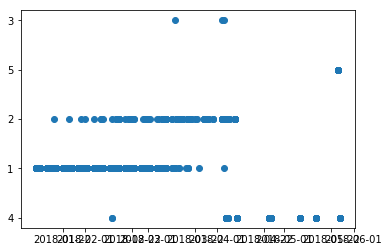

In [75]:
dates = matplotlib.dates.date2num(bills["status_date"])
matplotlib.pyplot.plot_date(dates, bills["status"])